# ex2.0 jack's car rental

## See p. 81 (section 4.3, example 4.2) in Sutton's Reinforcement learning: An introduction

Goal:

- understanding how to construct an environment
- understanding of the joint probability functions

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import numpy as np
from scipy.stats import poisson

N_CARS = 20

# renting and returning propabilitiesN_CARS
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS+ 1), 3)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 2)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)

Poisson distribution of rent and return cars (at second location):

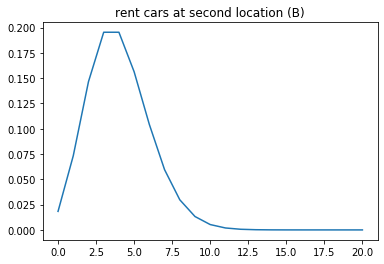

In [34]:
plt.title('rent cars at second location (B)')
plt.plot(P_RENT_B)

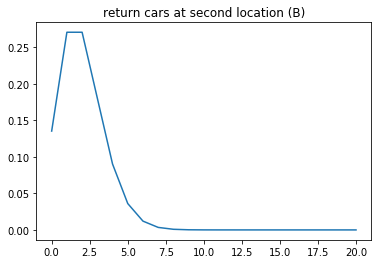

In [35]:
plt.title('return cars at second location (B)')
plt.plot(P_RETURN_B)

# Start! 

Implement useful functions for the environment of the Jack's car rental problem.

In [37]:
def step_rent(n_car, p):
    """return probability distribution over the number of cars after rent"""
    # code here ...
    # ...
    pp = []
    r=0
    c = n_car
    for i in range(0, N_CARS+1):
        if c>=0:
            pp.append(p[c])
        else:
            pp.append(0.0)
        c -= 1
        
        if i < n_car+1:
            r += (i * p[i])
        else:
            r += ((n_car) * p[i])
    r *= 10
    # pp is the probability over cars after rent
    # r is the expected reward
    return np.array(pp), r

def step_return(p_car, p):
    """return a distribution over the number of cars aftern returned"""
    # code here ...
    # ...
    pp = []
    for j in range(0, N_CARS+1):
        pp.append(np.sum(p_car[:j+1] * np.flip(p[:j+1])))
    # pp is the probability over cars after return
    return np.array(pp)

def step_rent_return(n_car, p_rent, p_return):
    """probability after rent and return for one day"""
    p, r = step_rent(n_car, p_rent)
    p = step_return(p, p_return)
    return p, r

## verify rent

reward: 29.99615904998222


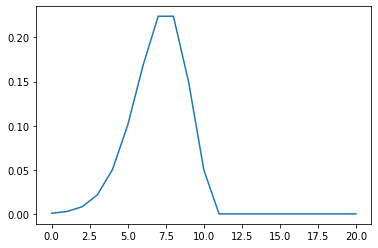

In [38]:
p, r = step_rent(10, P_RENT_A)
print('reward:', r)
plt.plot(p)

Expected result:

reward: 29.99615904998224

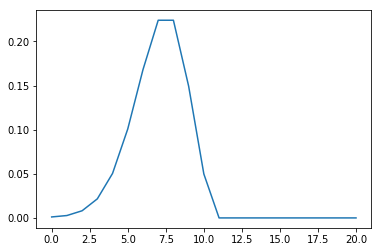

## verify return

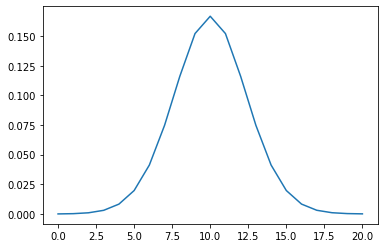

In [39]:
p, r = step_rent(10, P_RENT_A)
p = step_return(p, P_RETURN_A)
plt.plot(p)

Expected result:

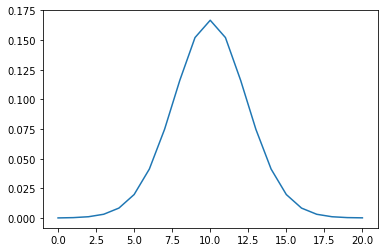

# The environment

Now implement the `step_env(s, a)` to be the environment. This function accepts a state (n_cars in A, n_cars in B) then returns the probability distribution over next state in terms of P(n_cars in A, n_cars in B) with an expected reward.

Hint: use the previous functions.

In [40]:
def step_env(s, a):
    """step a on state s, returning the next state distribution and the expected reward"""
    # s = (N_CARS_IN_A, N_CARS_IN_B)
    # move cars
    # code here ..
    p = np.zeros([N_CARS+1,N_CARS+1])
    
    p_a, r_a = step_rent_return(s[0]-a, P_RENT_A, P_RETURN_A)
    p_b, r_b = step_rent_return(s[1]+a, P_RENT_B, P_RETURN_B)
    
    p = np.outer(p_a, p_b) 
    # ...
    # renting and returning
    
    r = (-2)*np.abs(a) + r_a + r_b
    
    # p is the "joint" probability over cars at first and second location
    # p has the shape of [N_CARS+1, N_CARS+1] where the dim=0 is the first location, dim=1 is the second location
    # r is the expected reward
    return p, r

## verify the environment

reward: 66.03078823878607


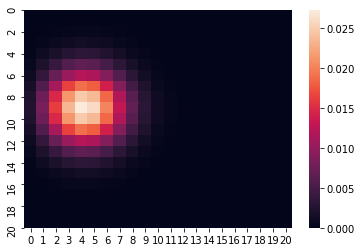

In [42]:
s = (10, 5)
p, r = step_env(s, 1)
print('reward:', r)
sns.heatmap(p)

Expected result:

reward: 66.0307882387861

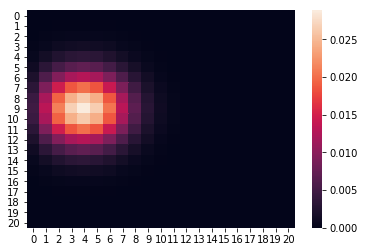